#### latitude,longitude,elevation,utc_offset_seconds,timezone,timezone_abbreviation
#### 43.625,79.375,640.0,-14400,America/New_York,GMT-4


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Columns

In [69]:
df = pd.read_csv("daily_data.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3551 entries, 0 to 3550
Data columns (total 71 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 3551 non-null   object 
 1   weather_code                         2821 non-null   float64
 2   temperature_2m_max                   2821 non-null   float64
 3   temperature_2m_min                   2821 non-null   float64
 4   apparent_temperature_max             2821 non-null   float64
 5   apparent_temperature_min             2821 non-null   float64
 6   sunrise                              3551 non-null   int64  
 7   sunset                               3551 non-null   int64  
 8   daylight_duration                    3551 non-null   float64
 9   sunshine_duration                    2820 non-null   float64
 10  uv_index_max                         1644 non-null   float64
 11  uv_index_clear_sky_max        

In [70]:
# Total unique output weather codes
len(df["weather_code"].unique())
print(df["weather_code"].unique())

[nan  0.  2.  3. 71. 75. 51. 65. 73. 45. 61. 53. 63.  1. 55. 95. 81. 57.
 67. 80. 56. 66.]


### Do we need sunset and sunrise times? another hassle to encode timings into numerical data

In [71]:
df = df.drop(["sunrise", "sunset"], axis =1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3551 entries, 0 to 3550
Data columns (total 69 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 3551 non-null   object 
 1   weather_code                         2821 non-null   float64
 2   temperature_2m_max                   2821 non-null   float64
 3   temperature_2m_min                   2821 non-null   float64
 4   apparent_temperature_max             2821 non-null   float64
 5   apparent_temperature_min             2821 non-null   float64
 6   daylight_duration                    3551 non-null   float64
 7   sunshine_duration                    2820 non-null   float64
 8   uv_index_max                         1644 non-null   float64
 9   uv_index_clear_sky_max               1644 non-null   float64
 10  rain_sum                             2820 non-null   float64
 11  showers_sum                   

In [72]:
# using only data from 2018, since there are missing values in previous years
df['date'] = pd.to_datetime(df['date'])
df = df[df['date'].dt.year >= 2018]
print(df.info())
print(df.head())



<class 'pandas.core.frame.DataFrame'>
Index: 2820 entries, 731 to 3550
Data columns (total 69 columns):
 #   Column                               Non-Null Count  Dtype              
---  ------                               --------------  -----              
 0   date                                 2820 non-null   datetime64[ns, UTC]
 1   weather_code                         2820 non-null   float64            
 2   temperature_2m_max                   2820 non-null   float64            
 3   temperature_2m_min                   2820 non-null   float64            
 4   apparent_temperature_max             2820 non-null   float64            
 5   apparent_temperature_min             2820 non-null   float64            
 6   daylight_duration                    2820 non-null   float64            
 7   sunshine_duration                    2820 non-null   float64            
 8   uv_index_max                         1644 non-null   float64            
 9   uv_index_clear_sky_max           

In [73]:
# Dropping columns who have more than 50% NaN values
threshold = len(df) * 0.5
df = df.dropna(axis=1, thresh=threshold)

df.to_csv("temp.csv", index = False)





In [74]:
# replace remaining empty values with median?
import pandas as pd

for col in df.columns:
    if df[col].isnull().any():  
        median_value = df[col].median()  
        df[col] = df[col].fillna(median_value)  
# Save result
df.to_csv("temp.csv", index=False)


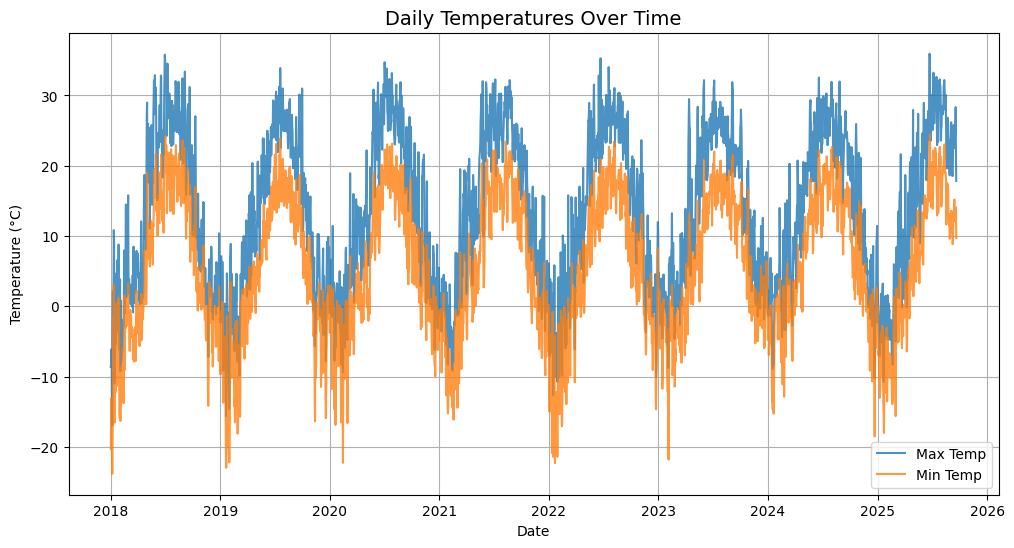

In [75]:
df = pd.read_csv("temp.csv")
df["date"] = pd.to_datetime(df["date"])

plt.figure(figsize=(12,6))
plt.plot(df["date"], df["temperature_2m_max"], label="Max Temp", alpha=0.8)
plt.plot(df["date"], df["temperature_2m_min"], label="Min Temp", alpha=0.8)

plt.title("Daily Temperatures Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


In [76]:
# converting month and year into cosine and sine
import pandas as pd
import numpy as np

df = pd.read_csv("temp.csv")
df["date"] = pd.to_datetime(df["date"])

df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day_of_month"] = df["date"].dt.day
df["day_of_week"] = df["date"].dt.dayofweek
df["day_of_year"] = df["date"].dt.dayofyear

# Periodic features for month (1-12)
df["month_sin"] = np.sin(2 * np.pi * df["month"] / 12)
df["month_cos"] = np.cos(2 * np.pi * df["month"] / 12)

# Periodic features for year (1-365)
df["year_sin"] = np.sin(2 * np.pi * df["day_of_year"] / 365.25)
df["year_cos"] = np.cos(2 * np.pi * df["day_of_year"] / 365.25)



In [77]:
df.to_csv("final.csv", index = False)

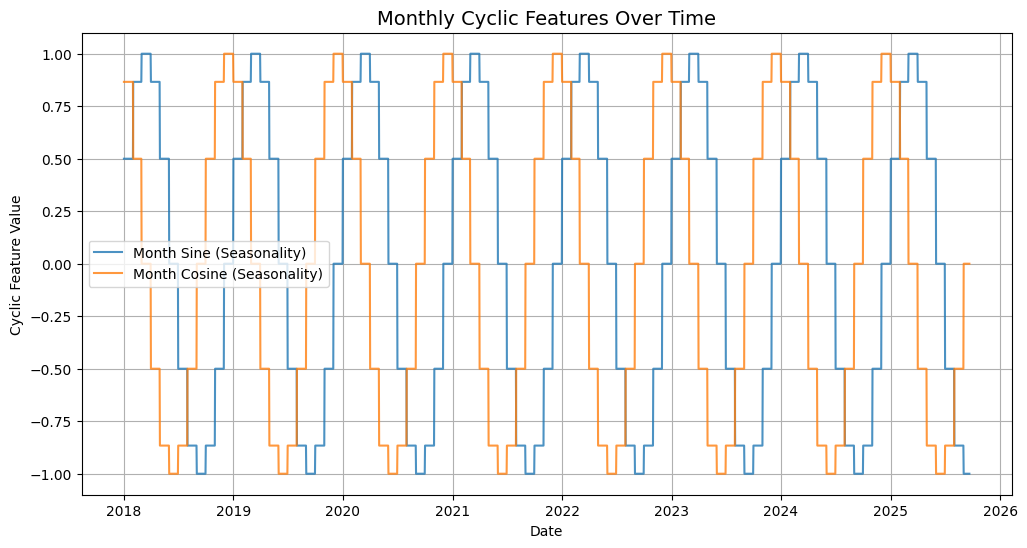

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("final.csv")
df["date"] = pd.to_datetime(df["date"])

plt.figure(figsize=(12,6))

plt.plot(df["date"], df["month_sin"], label="Month Sine (Seasonality)", alpha=0.8)
plt.plot(df["date"], df["month_cos"], label="Month Cosine (Seasonality)", alpha=0.8)

plt.title("Monthly Cyclic Features Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Cyclic Feature Value")
plt.legend()
plt.grid(True)
plt.show()


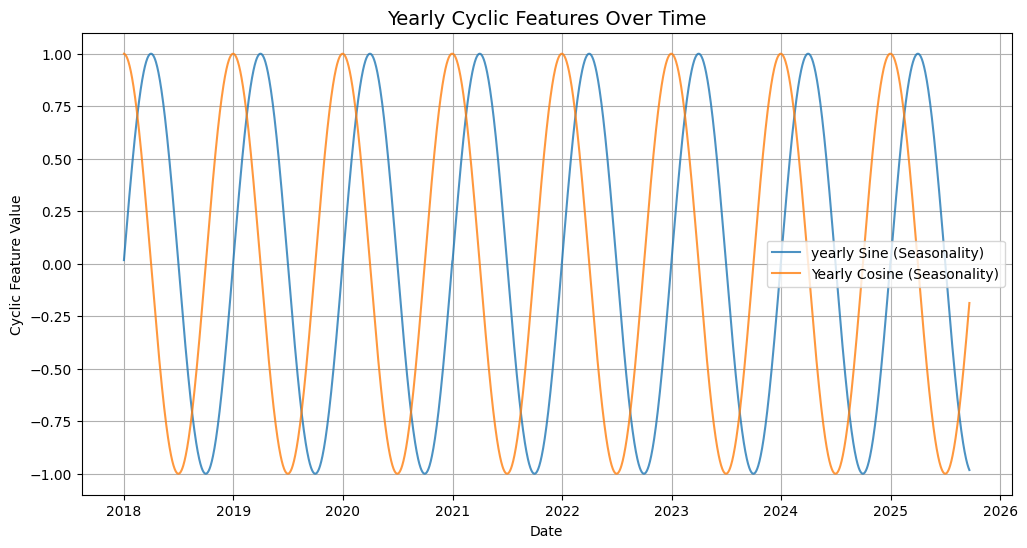

In [79]:
import pandas as pd

# Load CSV
df = pd.read_csv("final.csv")
df["date"] = pd.to_datetime(df["date"])

plt.figure(figsize=(12,6))

plt.plot(df["date"], df["year_sin"], label="yearly Sine (Seasonality)", alpha=0.8)
plt.plot(df["date"], df["year_cos"], label="Yearly Cosine (Seasonality)", alpha=0.8)

plt.title("Yearly Cyclic Features Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Cyclic Feature Value")
plt.legend()
plt.grid(True)
plt.show()
